In [2]:
import pandas as pd
import numpy as np
from utils.connect import get_data
from utils.tools import  CustomOneHotEncoder, CustomRobustScaler,CustomLabelEncoder,train_test_val_split
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=.8)
sns.set_style("ticks")
sns.set_palette("colorblind")


In [3]:
sql = """
select 

clz.CargaLectiva,clz.Sede,clz.Escuela,clz.Curricula,
clz.Curso,c.Nombre as NombreCurso,clz.Semestre,clz.Seccion,clz.Grupo,
c.NumeroCreditos,c.Ciclo,c.TipoCurso,c.HorasTeoria,c.HorasPractica,c.HorasLaboratorio,t.sexo as Sexo,
CONCAT(h.Dia,DATEPART(HOUR,h.HoraIni),'-',DATEPART(HOUR,h.HoraFin)) as Horario,
h.Turno 
from dbo.CargaLectivaZet as clz 
inner join dbo.Curso as c on c.Curso=clz.Curso and c.Curricula=clz.Curricula and c.Escuela=clz.Escuela
inner join dbo.Horario as h on clz.Horario=h.Horario
inner join dbo.Trabajador as t on t.Trabajador=clz.Trabajador
order by clz.Semestre desc ;"""
df_all=get_data(sql)
df_all['CargaLectiva']=df_all['CargaLectiva'].astype('str')
df_all

/app/notebooks/utils/connect.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,CargaLectiva,Sede,Escuela,Curricula,Curso,NombreCurso,Semestre,Seccion,Grupo,NumeroCreditos,Ciclo,TipoCurso,HorasTeoria,HorasPractica,HorasLaboratorio,Sexo,Horario,Turno
0,689298,01,35,04,I-6,QUÍMICA GENERAL,2022-2,1,1,4.0,I,O,3.0,2.0,0.0,M,LU11-12,M
1,693262,01,13,07,NA-B02,PROCESO ADMINISTRATIVO,2022-2,2,1,4.0,II,O,3.0,2.0,0.0,M,LU10-11,M
2,689398,01,08,05,CQ-R02,QUÍMICA ANALÍTICA,2022-2,2,2,4.0,IV,O,3.0,2.0,0.0,M,VI18-19,T
3,689174,01,09,07,VT-T02,TOPOGRAFÍA II,2022-2,2,1,4.0,IV,O,2.0,4.0,0.0,M,LU7-8,M
4,689299,01,35,04,I-6,QUÍMICA GENERAL,2022-2,1,1,4.0,I,O,3.0,2.0,0.0,M,LU12-13,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253203,81892,01,14,03,NC-F03,CONTAB. DE PROYECTOS Y DESARROLLO SOCIAL,2006-1,1,1,3.0,V,O,2.0,2.0,0.0,M,MI7-8,M
253204,81894,01,14,03,NC-F03,CONTAB. DE PROYECTOS Y DESARROLLO SOCIAL,2006-1,1,1,3.0,V,O,2.0,2.0,0.0,M,MI8-9,M
253205,83300,01,08,02,MM-A05,AUDITORÍA Y FISCALIZACIÓN MINERA,2006-1,1,1,3.0,IX,E,2.0,2.0,0.0,M,LU16-17,T
253206,83304,01,08,02,MM-A05,AUDITORÍA Y FISCALIZACIÓN MINERA,2006-1,1,1,3.0,IX,E,2.0,2.0,0.0,M,LU17-18,T


In [14]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253208 entries, 0 to 253207
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CargaLectiva      253208 non-null  object 
 1   Sede              253208 non-null  object 
 2   Escuela           253208 non-null  object 
 3   Curricula         253208 non-null  object 
 4   Curso             253208 non-null  object 
 5   NombreCurso       253208 non-null  object 
 6   Semestre          253208 non-null  object 
 7   Seccion           253208 non-null  object 
 8   Grupo             253208 non-null  object 
 9   NumeroCreditos    253208 non-null  float64
 10  Ciclo             253208 non-null  object 
 11  TipoCurso         253208 non-null  object 
 12  HorasTeoria       253208 non-null  float64
 13  HorasPractica     253208 non-null  float64
 14  HorasLaboratorio  253208 non-null  float64
 15  Sexo              253208 non-null  object 
 16  Horario           25

In [15]:
df_all.describe()

,NumeroCreditos,HorasTeoria,HorasPractica,HorasLaboratorio
count,253208.000000,253208.000000,253208.000000,253208.000000
mean,3.725641,2.461431,2.833489,0.018096
std,1.152007,0.927186,2.248612,0.317439
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,0.000000
50%,4.000000,2.000000,2.000000,0.000000
75%,4.000000,3.000000,3.000000,0.000000
max,20.000000,5.000000,40.000000,12.000000


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

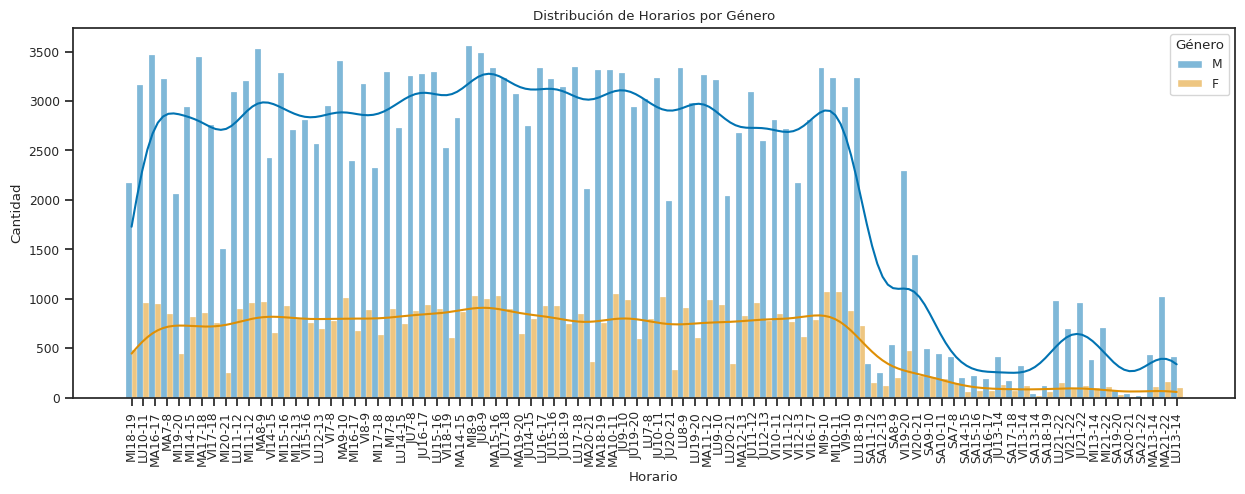

In [16]:

f=sns.histplot(
    df_all,
    x="Horario",
    hue="Sexo",
    kde=True, 
    multiple="dodge",
    discrete=True,
)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title("Distribución de Horarios por Género")
f.set_xlabel("Horario")
f.set_ylabel("Cantidad")
f.legend_.set_title("Género")
f.figure.canvas.figure.set_figwidth(15)

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

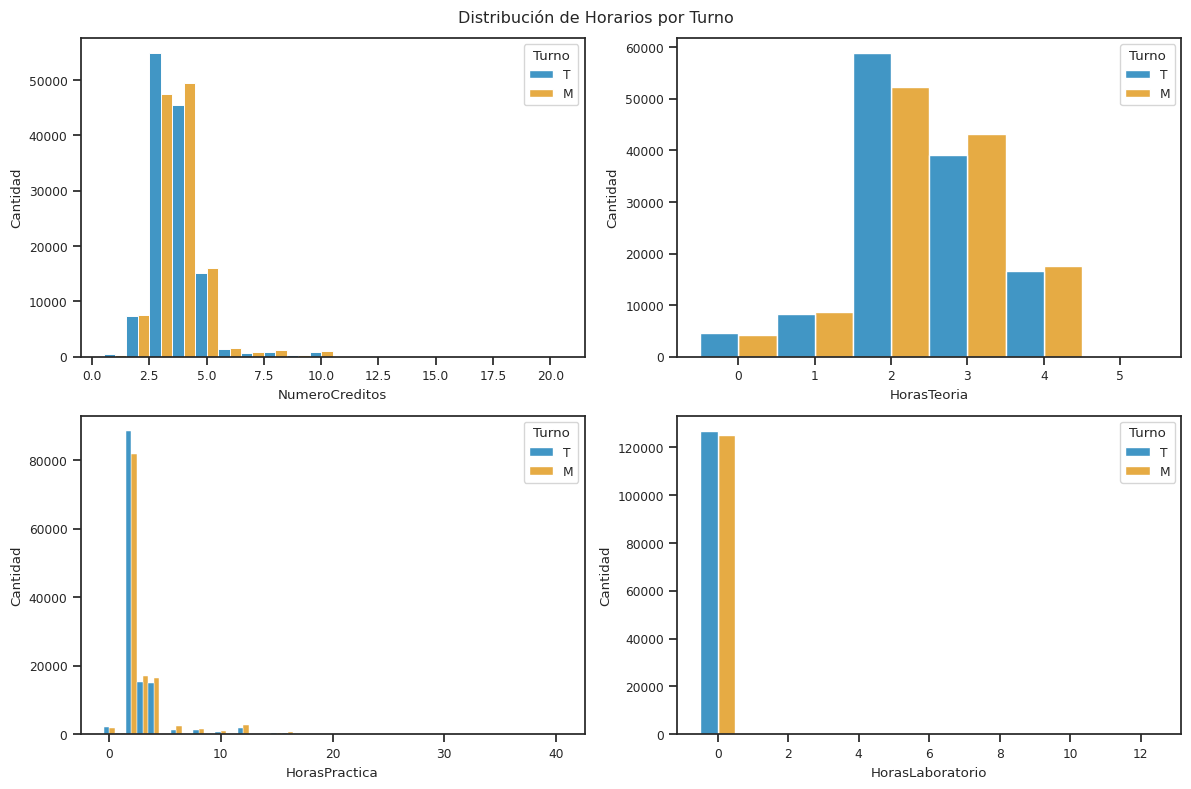

In [17]:
# grafica de preferencia de varones y mujeres en en los turno de mañana y tarde

fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.histplot(
    df_all,
    x="NumeroCreditos",
    hue="Turno",
   discrete=True,
   multiple="dodge",
   ax=ax[0,0]
)
sns.histplot(
    df_all,
    x="HorasTeoria",
    hue="Turno",
    discrete=True,
    multiple="dodge",
    ax=ax[0,1]
)

sns.histplot(
    df_all,
    x="HorasPractica",
    hue="Turno",
    discrete=True,
    multiple="dodge",
    ax=ax[1,0]
)

sns.histplot(
    df_all,
    x="HorasLaboratorio",
    hue="Turno",
    discrete=True,
    multiple="dodge",
    ax=ax[1,1]
)

fig.suptitle("Distribución de Horarios por Turno")
fig.tight_layout()
fig.axes[0].set_ylabel("Cantidad")
for ax in fig.axes:
    ax.set_ylabel("Cantidad")

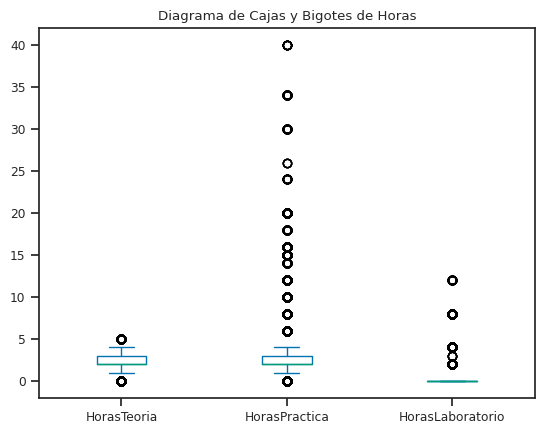

In [18]:
df_all[['HorasTeoria', 'HorasPractica', 'HorasLaboratorio']].plot.box()
plt.title('Diagrama de Cajas y Bigotes de Horas')
plt.show()

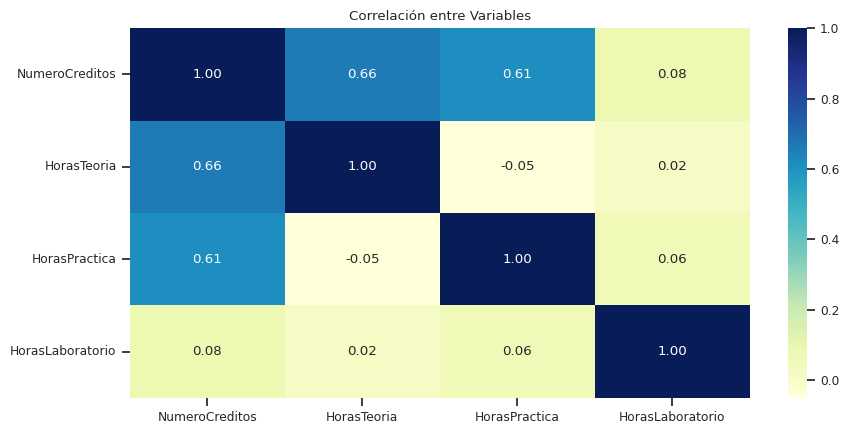

In [19]:

f=sns.heatmap(df_all.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="YlGnBu")
f.set_title("Correlación entre Variables")
f.figure.canvas.figure.set_figwidth(10)


In [20]:
f=sns.pairplot(
    df_all,
    hue="Turno"
)
f.fig.suptitle("Distribución de Variables")
f.fig.canvas.figure.set_figwidth(10)


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

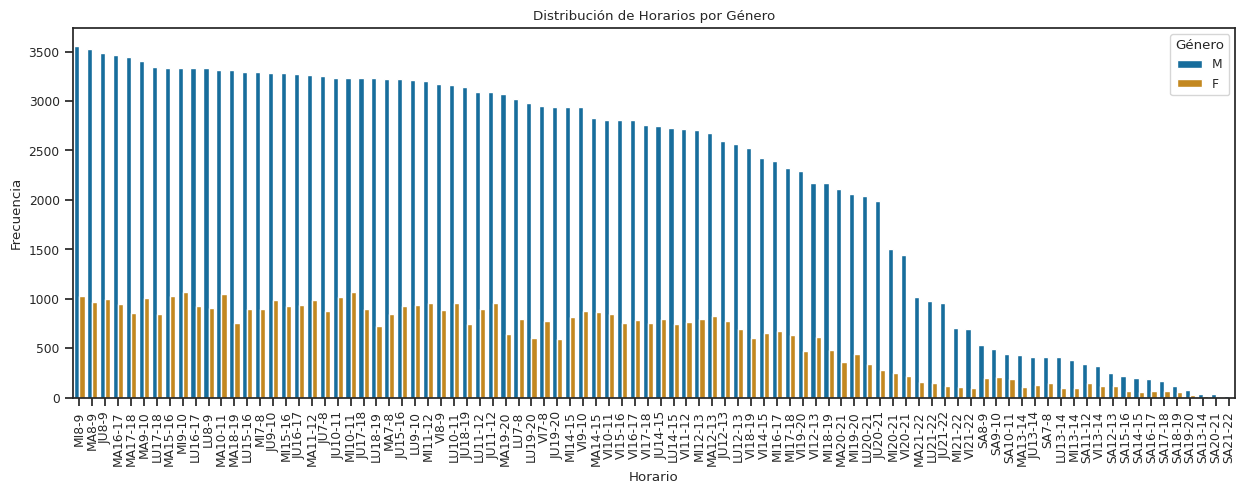

In [ ]:
f = sns.barplot(
    df_all.groupby(["Horario", "Sexo"])
    .size()
    .reset_index(name="Cantidad")
    .sort_values(by=["Cantidad"], ascending=False),
    x="Horario",
    y="Cantidad",
    hue="Sexo",
)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title("Distribución de Horarios por Género")
f.set_xlabel("Horario")
f.set_ylabel("Frecuencia")
f.legend(
    title="Género",
    loc="upper right",
)
f.figure.canvas.figure.set_figwidth(15)